# Machine Learning II Project

Group Members:
- Daniel Kruk 20211687
- Marcelo Junior 20211677

Starting of this project like any other, we make the importations

In [52]:
#Package Importation for this notebook (for the execution of EDA)
import pandas as pd
import geopandas as gpd #still averiguating how to use
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import seaborn as sns
import plotly.express as px
from pylab import rcParams

In the cell below we are importing the dataset and every file that it consists of

In [53]:
#Dataset Importation
path = "C:\\Users\\HP\\OneDrive\\Documents\\College Bizzness\\2nd Semester - 2nd Year\\Machine Learning II\\Practical Project Data\\KeizerKrukis\\Project Data\\"


#Customer Info CSV
customer_info = pd.read_csv(path + "Customer Info PPC.csv")

#Customer Basket CSV
customer_basket = pd.read_csv(path + "Customer Basket Dataset.csv")

#Product Mapping Excel File
product_mapping = pd.read_excel(path + "Product Mapping Excel File.xlsx")

In the cells below we are taking an initial look to every imported dataset

In [54]:
#Starting off with the customer_info dataset
customer_info

,customer_id,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,...,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,HasLoyaltyCard,family_size,total_spending
0,4239,Sara Moscowitz,0,0,23,0.0,0.0,0.0,2.0,91.0,...,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397,0,0.0,1545.0
1,19330,Donald Robertson,0,1,41,1.0,0.0,0.0,2.0,197.0,...,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197,0,1.0,10219.0
2,2272,Felicia Bradshaw,3,0,36,1.0,1.0,0.0,20.0,397.0,...,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113,0,2.0,1753.0
3,25288,Emma Williams,0,0,80,3.0,4.0,1.0,2.0,5282.0,...,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589,0,7.0,11195.0
4,12829,Hilda Huerta,0,0,23,0.0,0.0,0.0,2.0,82.0,...,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970,0,0.0,1370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,625,Karen Watts,3,0,48,0.0,0.0,1.0,2.0,209.0,...,1984.0,112.0,0.096366,2008.0,935162.0,38.734446,-9.171911,1,0.0,9730.0
29996,26447,Curtis Thompson,0,1,37,0.0,0.0,0.0,3.0,185.0,...,197.0,22.0,0.118998,2014.0,NaN,38.767070,-9.144301,0,0.0,2416.0
29997,182,Richard Carter,0,1,22,0.0,0.0,0.0,2.0,83.0,...,94.0,77.0,0.199432,2016.0,953891.0,38.728487,-9.164140,1,0.0,1491.0
29998,13768,Jerry Yoder,0,1,64,1.0,0.0,1.0,20.0,391.0,...,5.0,398.0,0.494527,2006.0,NaN,38.751123,-9.182512,0,1.0,1608.0


In [55]:
#Then checking the customer_basket dataset
customer_basket

,customer_id,invoice_id,list_of_goods
0,7980,6494405,"['fresh bread', 'cake', 'grated cheese', 'fren..."
1,9995,6855482,"['bramble', 'beer', 'white wine', 'almonds', '..."
2,10060,3614116,"['fromage blanc', 'olive oil', 'tomato sauce',..."
3,1461,6464656,"['pokemon shield', 'white wine', 'google table..."
4,7830,10330249,"['olive oil', 'deodorant', 'whole weat flour',..."
...,...,...,...
79995,360,11470275,"['tomatoes', 'ham', 'zucchini', 'frozen vegeta..."
79996,3116,7483644,"['pet food', 'soup', 'beer', 'fromage blanc', ..."
79997,1546,9168204,"['cake', 'french fries', 'cooking oil', 'muffi..."
79998,7242,5054623,"['fromage blanc', 'napkins', 'sandwich', 'hone..."


In [56]:
#Then looking at the product_mapping dataset
product_mapping

,product_name,category
0,champagne,alcohol_drinks
1,bramble,alcohol_drinks
2,white wine,alcohol_drinks
3,dessert wine,alcohol_drinks
4,french wine,alcohol_drinks
...,...,...
159,portal,videogames
160,portal 2,videogames
161,final fantasy XX,videogames
162,final fantasy XIX,videogames


#### - Analyzing the customer_info dataset
In this section we are going to make an initial analysis of the main dataset of interest for the project which is the customer_info dataset

In [57]:
#Starting off by checking what are our columns the datatypes of those same columns using the .info() method
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              30000 non-null  int64  
 1   customer_name                            30000 non-null  object 
 2   highest_education                        30000 non-null  int64  
 3   customer_gender                          30000 non-null  int64  
 4   Age                                      30000 non-null  int64  
 5   kids_home                                30000 non-null  float64
 6   teens_home                               30000 non-null  float64
 7   number_complaints                        30000 non-null  float64
 8   distinct_stores_visited                  30000 non-null  float64
 9   lifetime_spend_groceries                 30000 non-null  float64
 10  lifetime_spend_electronics               30000

In [58]:
#And then by checking what are the descriptive statistics of these same variables as well, using the method .describe()
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,30000.0,1.500050e+04,8660.398374,1.000000e+00,7500.750000,15000.500000,22500.250000,30000.000000
highest_education,30000.0,7.619667e-01,1.094172,0.000000e+00,0.000000,0.000000,2.000000,3.000000
customer_gender,30000.0,5.030000e-01,0.499999,0.000000e+00,0.000000,1.000000,1.000000,1.000000
Age,30000.0,5.173890e+01,17.899754,2.100000e+01,36.000000,52.000000,67.000000,83.000000
kids_home,30000.0,1.146700e+00,1.234111,0.000000e+00,0.000000,1.000000,1.000000,10.000000
teens_home,30000.0,5.129333e-01,0.912502,0.000000e+00,0.000000,0.000000,1.000000,9.000000
number_complaints,30000.0,7.643667e-01,0.836341,0.000000e+00,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,30000.0,6.120767e+00,6.511410,0.000000e+00,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,30000.0,3.978634e+03,5280.641466,0.000000e+00,220.000000,950.000000,5253.000000,18852.000000
lifetime_spend_electronics,30000.0,9.652388e+02,1755.323397,1.058527e+00,45.000000,194.000000,721.000000,6603.000000


#### - Analyzing the customer_basket dataset
Just like in the section above, in this one we will be taking a quick overview of the variables of this dataset 

In [59]:
#Starting off just like in the previous steps by using the .info() method to see what are our variables
customer_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    80000 non-null  int64 
 1   invoice_id     80000 non-null  int64 
 2   list_of_goods  80000 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


Because the columns don't seem to transmit that much interest, for now we will be leaving this dataset to work on the customer_info dataset which seems to pose many more problems

## Analyzing the variables of the customer_info dataset

To analyze the variables of this dataset, different types of graphics are going to be utilized according to the type of the variable that is going to be explored for each occasion <br>
<br>
Using the `.describe()` method a few steps above, we could realize that there were some cases where there was a certain sparseness of some of the datasets' variables (possibly with the existence of outliers or even just because that is the way our customers' pole actually exists) <br>
<br>
Having this in mind, we know that in the dataset and among the numerical variables there are different types of variables - both ordinal and discrete. Thus, in the following section we are going to analyze every one of these "interesting" variables using the type of graphic that in our opinion suits best for each case.


In [60]:
'''
Firstly we are going to redefine the parameter which regards
the size of every graphic that is going to be displayed throughout this document
'''
rcParams['figure.figsize'] = 15, 8


#### 1. Using Pie charts to evaluate the difference between each category of every binary variable
In the `customer_info` dataset, the variables `customer_gender` and `has_loyalty_card` are binary variables and to evaluate the difference between the possible answers we will be using pie charts (one for each)

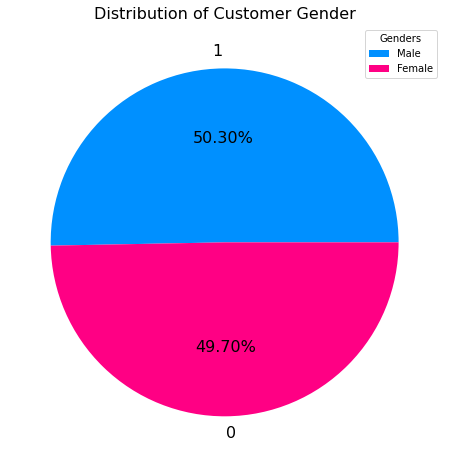

In [61]:
customer_info['customer_gender'].value_counts().plot(
    kind= 'pie', 
    autopct = '%1.2f%%', 
    colors = ['#0090FF', '#FF0084'],
    textprops = {'fontsize' : 16}
    )

plt.legend(title = "Genders", 
           labels=['Male' if x == 1 else 
                   'Female' for x in customer_info['customer_gender'].value_counts().index], 
           loc = "upper right"
           )

plt.title("Distribution of Customer Gender", fontsize = "16")
plt.ylabel("")

plt.show()


<AxesSubplot:>

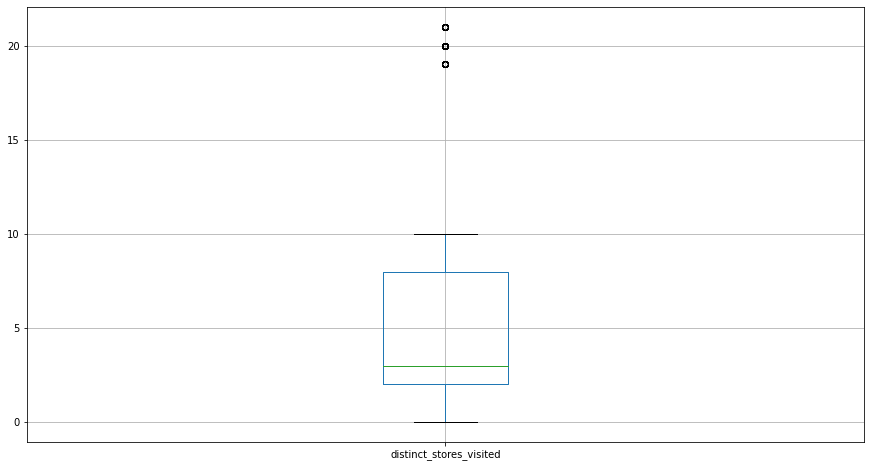

In [62]:
#Distinct_stores_visited boxplot
customer_info.boxplot('distinct_stores_visited')

<AxesSubplot:>

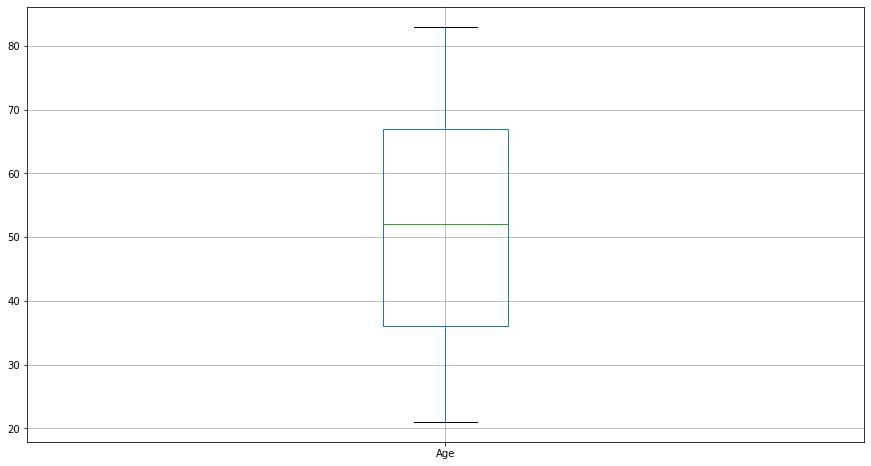

In [63]:
#Age boxplot
customer_info.boxplot('Age')

#### 2. Using bar charts to count of every categorical variable
 - Objective: to create a bar chart for every variable (possibly using subplots)
 - Variables that apply:
    - highest_education;
    - 

array([[<AxesSubplot:title={'center':'highest_education'}>]], dtype=object)

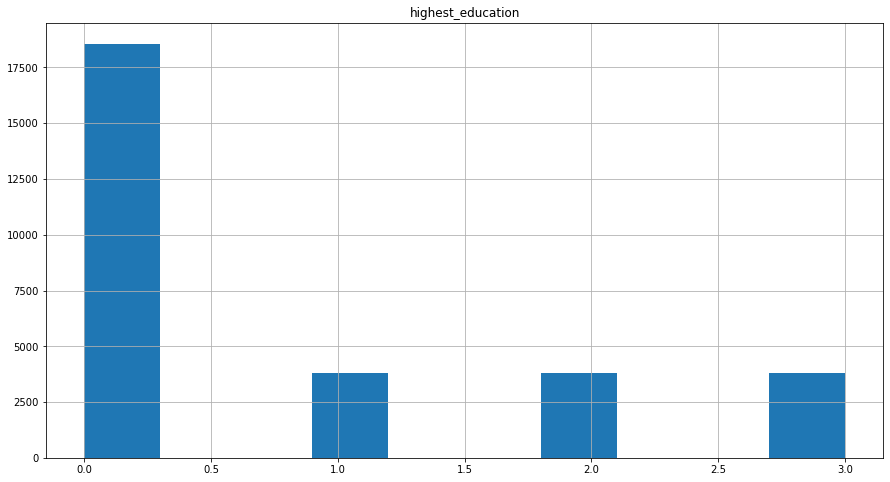

In [64]:
customer_info.hist('highest_education')

#### 3. Using piecharts evaluate the differences between every category of every binary variable
 - Objective: to create a pie chart for every variable (possibly using subplots)
 - Variables that apply:
    - customer_gender;
    - HasLoyaltyCard;
    - 

# Ideas of columns to add to the datasets <br>
**Customer Basket dataset** <br>
no. of products in basket <br>
total value of basket (total amount) <br>


**Customer Info dataset** <br>
replace customer card info / add a different column -> customer card as binary (yes or no/ 1/0) <br>

In [65]:
#attempting map creation
#Conversion of the customer_info dataframe into a geopandas dataframe
geo_customer_info = gpd.GeoDataFrame(customer_info, geometry=gpd.points_from_xy(customer_info.longitude,
                                                                         customer_info.latitude))

In [66]:
#alterei alguma cena